## Clustering the workers based on their reliability

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import zscore
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from util import create_matrix, gather_dataset
from tqdm.notebook import tqdm

In [3]:
df = gather_dataset('./data/claimant_data/')

/home/bbjoverbeek/master_thesis/util.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix.fillna(-1)


Text(0.5, 1.0, 'Elbow curve')

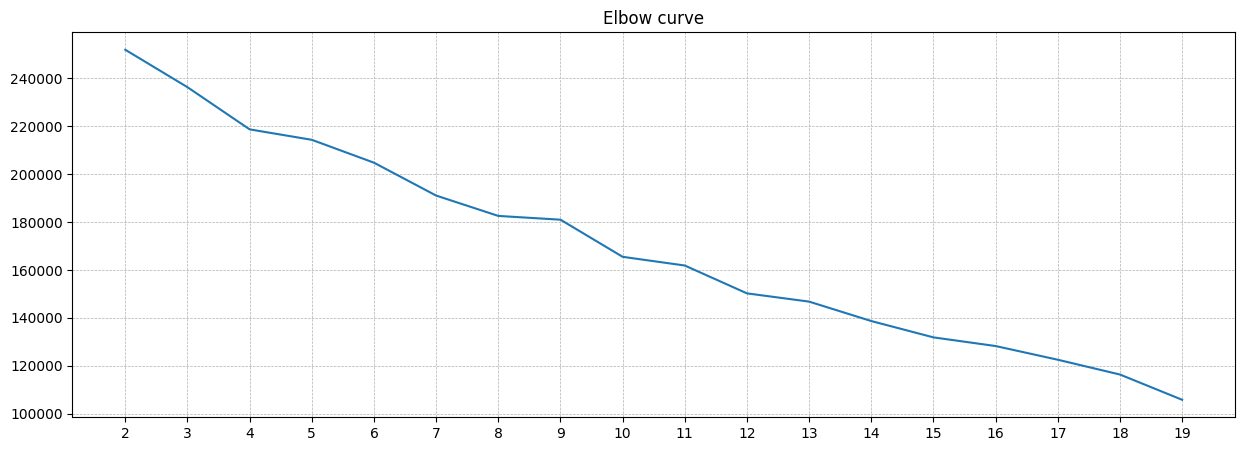

In [25]:
# examine optimal number of clusters (clustering voting behaviour) when using k-means

matrix = create_matrix(df['worker_id'].unique(), df['task_id'].unique(), df)
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(matrix)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Elbow curve')

In [26]:
from numpy import ndarray
def create_z_matrix(
    workers: ndarray, tasks: ndarray, judgements: pd.DataFrame
) -> pd.DataFrame:
    """Create a matrix where the rows are the users and the columns are the judgements."""

    matrix = pd.DataFrame(index=list(workers), columns=list(tasks))

    for judgement in tqdm(judgements.itertuples(), total=len(judgements), leave=False):
        if judgement.z_score != None:
            matrix.loc[judgement.worker_id, judgement.task_id] = judgement.z_score

    # fill in the empty values with -1
    matrix = matrix.fillna(-1)

    return matrix

  0%|          | 0/17300 [00:00<?, ?it/s]

/tmp/ipykernel_414688/3742636435.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix.fillna(-1)


Text(0.5, 1.0, 'Elbow curve')

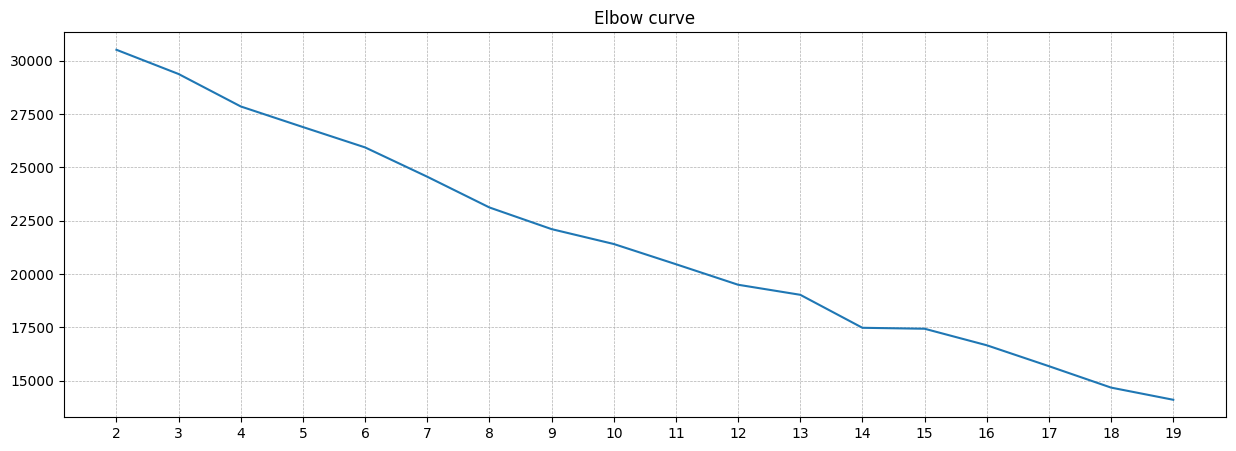

In [27]:
df['z_score'] = zscore(df['score'])
z_matrix = create_z_matrix(df['worker_id'].unique(), df['task_id'].unique(), df)
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(z_matrix)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Elbow curve')

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [29]:
from util import gather_dataset

df = gather_dataset("./data/claimant_data/")

df.head()
df

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,GM7WMPEN2H9W,06df3f08-943d-4e06-82a5-e01b8e728eef,0851dfb4-3a56-4f22-8102-11845ed2b0b8,cdc-gov_20170618T093441.conll.annot,49,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18,www.cdc.gov,"Vaccine safety experts , including experts at ...",5 - The source is fully reliable,NaN,6,5
2796,GM7WMPEN2H9W,010aea82-b165-4223-901f-293288d40d48,86e91415-b492-468f-8242-369282767514,thinktwice-com_20170627T225319.conll.annot,30,1,www.thinktwice.com,Dean,2 - The source is somewhat unreliable,NaN,6,2
2797,GM7WMPEN2H9W,063de570-091a-449c-9942-5b284269b57d,6e956875-5126-4c47-aeb5-eec599b5017b,NaturalNews_20170628T201245.conll.annot,6,29 30 31 32 33 34 35 36,NaturalNews,"Leslie Manookian , a documentary filmmaker and...",3 - The source is potentially reliable,NaN,6,3
2798,GM7WMPEN2H9W,029e3df0-5eeb-4592-828a-4b1aa3f93abf,b1fe2feb-6fac-4919-8120-0a8a7492b56f,content-healthaffairs-org_20170210T090820.conl...,72,3 4 5 6 7 8 9 10 11 12 13 14 15,content.healthaffairs.org,this historical overview of vaccines and immun...,3 - The source is potentially reliable,NaN,6,3


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit_transform(matrix)
print('n_components - cumsum')
for n_components, cumsum_ in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(n_components, cumsum_)

n_components - cumsum
0 0.12688983097394713
1 0.22945740462199898
2 0.29706336622383334
3 0.3561550049031841
4 0.41301252042874403
5 0.45837573495392764
6 0.4995951579504057
7 0.5328318130967403
8 0.5619671756633221
9 0.5904561531503638
10 0.6168637233104733
11 0.6421193348652564
12 0.6646561017389551
13 0.6841201591656287
14 0.7032628815947884
15 0.7207903526856
16 0.7364937382847704
17 0.7512064396798682
18 0.7655053762773211
19 0.7781302516922994
20 0.7899248283010528
21 0.801316595044935
22 0.8116387880155614
23 0.821526751976112
24 0.8308076464606136
25 0.8397906656830744
26 0.8485639715199965
27 0.8568472493663309
28 0.8645675727031642
29 0.8720464880301353
30 0.8794023910829682
31 0.8862926103443437
32 0.892785250619648
33 0.898592912943476
34 0.9043221650030089
35 0.9098405729130999
36 0.9150116993245646
37 0.919977797225056
38 0.9245837198174153
39 0.9289751250318097
40 0.9328701678594674
41 0.9366648525071055
42 0.940349970975824
43 0.9438321329101997
44 0.9471262890961148
45

In [32]:
pca = PCA(n_components=69)
pcs = pca.fit_transform(matrix)
pcs.shape

(107, 69)

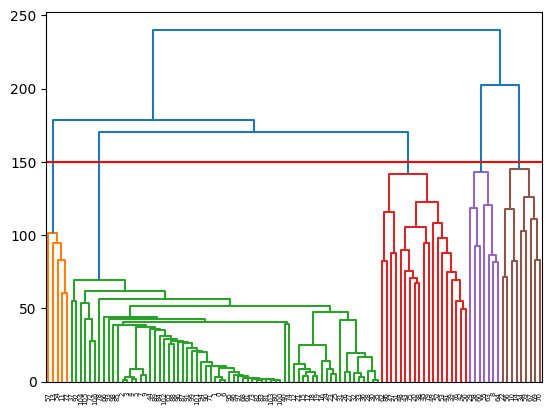

In [33]:
clusters = linkage(pcs, method='ward', metric='euclidean')
dendrogram(clusters)
plt.axhline(y = 150, color = 'r', linestyle = '-')

In [34]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(pcs)
clustering_model.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 0, 3, 4, 3, 0, 4, 4, 4, 4, 4, 1, 4,
       0, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 1, 1, 4, 1, 1, 1,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 2, 0, 2, 4, 1, 2, 2, 4,
       4, 0, 4, 0, 0, 4, 4, 4, 4, 1, 1, 3, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [35]:
pcs_matrix = pd.DataFrame(pcs, index=matrix.index)

pcs_matrix

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
23QWQCPZ7PNP,-10.859761,-4.190567,-3.611035,0.372653,-1.982917,-1.823008,-0.688975,-0.810236,-0.555048,-0.821855,...,0.525507,-0.448834,0.257789,-0.332844,-0.182599,-0.616766,-0.158439,-0.118576,-0.470172,0.054309
9R3XRNAAW7RR,-10.894862,-4.285328,-3.623209,0.461193,-2.179935,-1.847226,-0.718293,-0.745864,-0.284646,-0.846478,...,1.019221,-1.058954,0.233844,0.043538,-0.130553,-0.516942,-0.110569,-0.137242,-0.562499,0.138980
MWHG9Y6DNGR9,-10.941749,-4.326788,-3.625862,0.596774,-2.295728,-1.850582,-0.699485,-0.725153,-0.143623,-0.851729,...,0.896184,-0.705120,0.055627,0.431798,-0.315097,-0.271503,0.211133,0.002222,-0.471880,-0.155886
D7HVJTEKMYNW,-10.958099,-4.352938,-3.670190,0.552507,-2.342493,-1.874553,-0.679680,-0.669871,-0.112843,-0.924353,...,1.234326,-1.169574,0.121237,0.461582,-0.167273,-0.314916,-0.080509,-0.106709,-0.629076,0.217508
VPZ2EYZE9RZ7,-10.912511,-4.452990,-3.612932,0.656264,-2.421596,-1.859696,-0.722585,-0.668947,0.219251,-0.976992,...,0.271933,0.017864,-0.150561,0.602735,-0.223063,0.233692,0.543918,0.017830,0.021437,0.183148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MN73CV29YNDD,-9.345749,-4.494814,-5.703846,-0.057653,-1.653566,2.317477,-1.354960,3.342001,-2.311507,1.157129,...,0.105604,2.842185,1.303557,-9.934009,11.843691,3.418325,0.820396,0.635358,0.213960,-3.425177
V6ZR7KQXC7EP,-10.762385,-4.178517,-3.551625,0.363060,-1.879835,-1.744250,-0.743753,-0.813768,-0.620724,-0.710448,...,0.133694,0.019546,0.318250,-1.013790,0.436203,-0.428959,0.048342,-0.125167,-0.113420,-0.173268
2ME4D2R27FJK,-3.853334,-6.773391,-13.521631,-2.673778,-1.107124,14.357725,-2.389774,15.504595,-5.140781,10.538634,...,0.070098,-0.474010,0.214003,1.975919,-1.442869,-0.417349,0.109420,-0.618334,-0.349841,-0.210759
R463G9WD4FFY,-6.085848,-7.741482,-8.403991,-2.070628,0.119193,5.253840,-2.491075,3.850704,-0.377849,3.956058,...,-0.951354,0.004058,0.196804,-0.809135,1.522111,0.547179,0.128599,0.298709,-0.165085,0.035814


In [36]:
# write the clusters
for cluster_id in np.unique(clustering_model.labels_):
    subset = pd.DataFrame()
    for worker_id, cluster in zip(matrix.index, clustering_model.labels_):
        if cluster_id == cluster:
            subset = pd.concat([subset, matrix[matrix.index == worker_id]])
        
    subset.to_csv(f'./clusters/cluster_{cluster_id}.csv', index=False)


In [37]:
!rm clusters/clusters_concat.csv
!for f in clusters/*[0-9].csv; do (cat "${f}"; echo) >> clusters/clusters_concat.csv; done

After this some manual processing was done in google sheets to visualize the data:
- Remove the headers for the columns in all clusters but the first one
- Add an empty column between batches (code below was used to find after which column)

In [38]:
for batch_no in df['batch_no'].unique():
    unique_tasks = set()
    last_unique = None
    for task_id in df[batch_no == df['batch_no']]['task_id']:
        if task_id not in unique_tasks:
            last_unique = task_id
            unique_tasks.add(task_id)
    print(f'Batch {batch_no} - Last unique task: {last_unique}')

Batch 1 - Last unique task: 12c71e86-2a2c-42d2-9391-aabf21b837fc
Batch 5 - Last unique task: 05e39811-9d38-4145-bc0c-59625a3f6fd2
Batch 3 - Last unique task: 02f07c9d-5d61-4971-85d4-0fa3dbff761e
Batch 4 - Last unique task: 007b1683-3ee5-4c3e-8c3a-6f41f0aef219
Batch 2 - Last unique task: 012df0ac-3bca-4f92-8ce1-f452f918b919
Batch 6 - Last unique task: 05226b98-2dac-45a1-b482-f7ac26f75a1d


## TSNE visualization

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=69, n_iter=300)
tsne_results = tsne.fit_transform(pcs)

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 107 samples in 0.000s...
[t-SNE] Computed neighbors for 107 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 107 / 107
[t-SNE] Mean sigma: 35.261245
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.599678
[t-SNE] KL divergence after 300 iterations: 0.090116


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

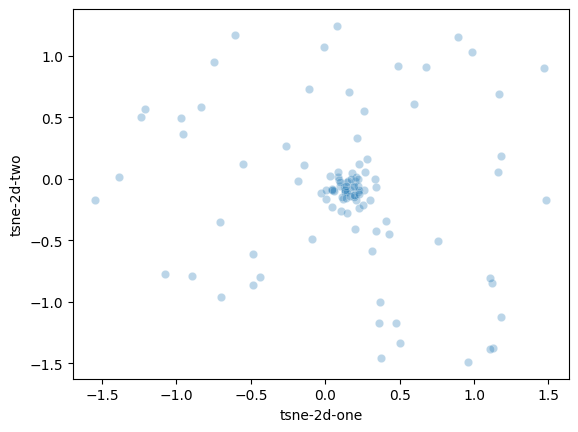

In [40]:
from seaborn import scatterplot, color_palette

tsne_results_df = pd.DataFrame()
tsne_results_df['tsne-2d-one'] = tsne_results[:,0]
tsne_results_df['tsne-2d-two'] = tsne_results[:,1]

scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=tsne_results_df,
    legend="full",
    alpha=0.3
)

## Group users based on their average score (exluding 0 scores)

<Axes: >

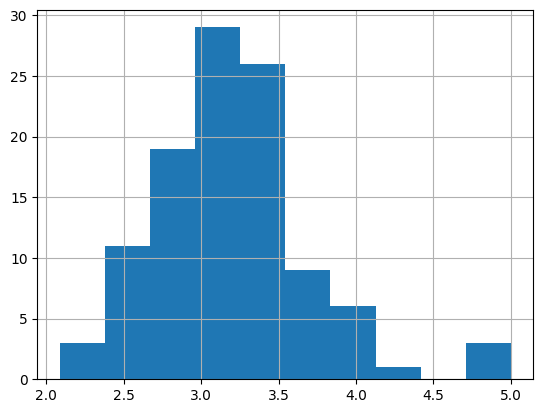

In [5]:
# create df with users, their average scores, and the number of scores they have

avg_worker_score_df = pd.DataFrame(columns=['worker_id', 'avg_score', 'support'])

avg_worker_score_df['worker_id'] = df['worker_id'].unique()
df_no_zeros = df[df['score'] != 0]

for worker_id in avg_worker_score_df['worker_id']:
    # add the average score and the number of scores
    avg_worker_score_df.loc[avg_worker_score_df['worker_id'] == worker_id, 'avg_score'] = df_no_zeros[df_no_zeros['worker_id'] == worker_id]['score'].mean()
    # add the number of scores they gave for this average
    avg_worker_score_df.loc[avg_worker_score_df['worker_id'] == worker_id, 'support'] = df_no_zeros[df_no_zeros['worker_id'] == worker_id].shape[0]

# avg_worker_score_df

avg_worker_score_df['avg_score'].hist()

[]

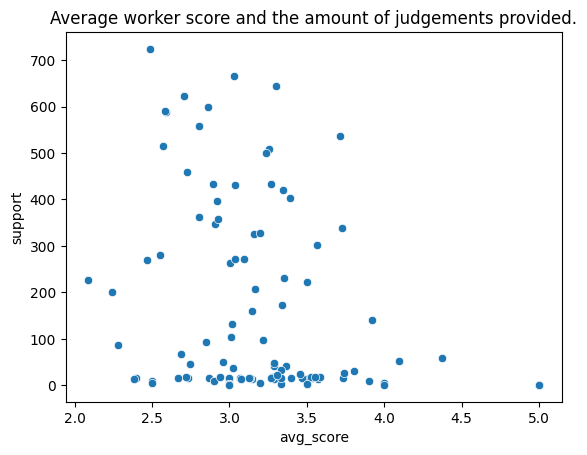

In [7]:
from seaborn import scatterplot

scatterplot(data=avg_worker_score_df, x='avg_score', y='support').set_title('Average worker score and the amount of judgements provided.')
plt.plot()

group_equal
medium    54
low       48
high       5
Name: count, dtype: int64


<Axes: >

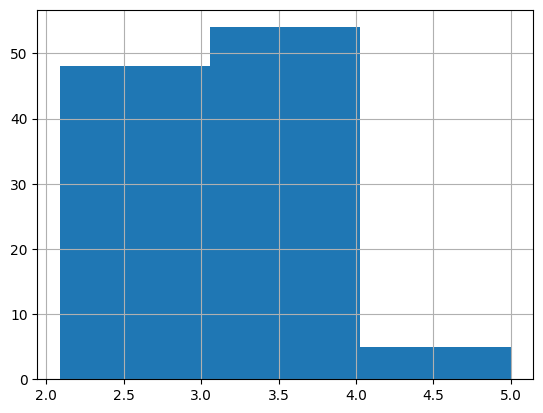

In [43]:
# now group users into three groups based on their average score

avg_worker_score_df['group_equal'] = pd.cut(avg_worker_score_df['avg_score'], bins=3, labels=['low', 'medium', 'high'])

print(avg_worker_score_df['group_equal'].value_counts())
avg_worker_score_df['avg_score'].hist(bins=3)

group_custom
medium    61
low       41
high       5
Name: count, dtype: int64


<Axes: >

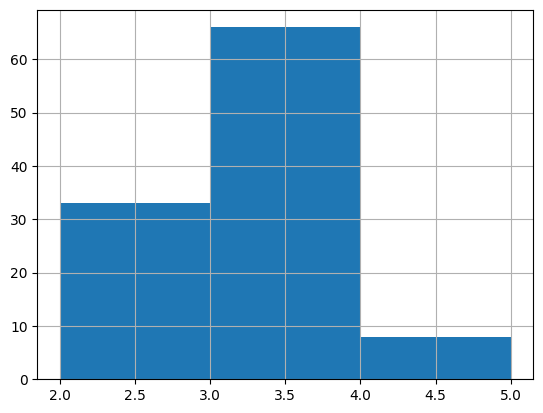

In [44]:
# alternatively group based on custom bins (0-3, 3-4, 4-5)

avg_worker_score_df['group_custom'] = pd.cut(avg_worker_score_df['avg_score'], bins=[0, 3, 4, 5], labels=['low', 'medium', 'high'])

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(avg_worker_score_df)

print(avg_worker_score_df['group_custom'].value_counts())
avg_worker_score_df['avg_score'].hist(bins=[2, 3, 4, 5])

In [45]:
avg_worker_score_df

,worker_id,avg_score,support,group_equal,group_custom
0,23QWQCPZ7PNP,5.0,1,high,high
1,9R3XRNAAW7RR,3.5,4,medium,medium
2,MWHG9Y6DNGR9,4.0,5,medium,medium
3,D7HVJTEKMYNW,4.0,6,medium,medium
4,VPZ2EYZE9RZ7,3.0,10,low,low
...,...,...,...,...,...
102,MN73CV29YNDD,3.304348,23,medium,medium
103,V6ZR7KQXC7EP,3.0,1,low,low
104,2ME4D2R27FJK,3.214286,98,medium,medium
105,R463G9WD4FFY,4.096154,52,high,high


In [48]:
df['z_score'] = zscore(df['score'])

      worker_id   z_score group_equal
0  2AZWNZRTVACE  1.141565         low
1  2GKTZAGQYCN4  0.963968         low
2  2KJAY9AMYRCD  0.754633         low
3  2ME4D2R27FJK  0.932414      medium
4  2VHW4RE6AKTN  1.027093         low


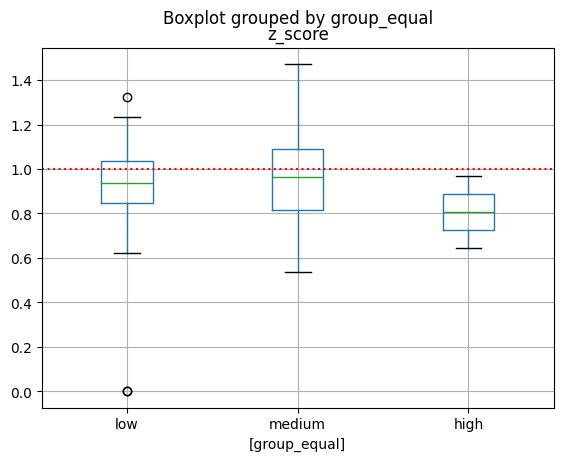

In [69]:
stdevs = pd.merge(df.groupby('worker_id')['z_score'].std().dropna(), avg_worker_score_df[['worker_id', 'group_equal']], how='inner', on='worker_id')
print(stdevs.head())

stdevs.boxplot(by='group_equal')
plt.axhline(y=df['z_score'].std(), color='r', linestyle=':')
plt.show()